In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [1]:
import sys 
sys.path.append("./MTH309_edX/python_lib")
import graders309 as gr

<IPython.core.display.Javascript object>


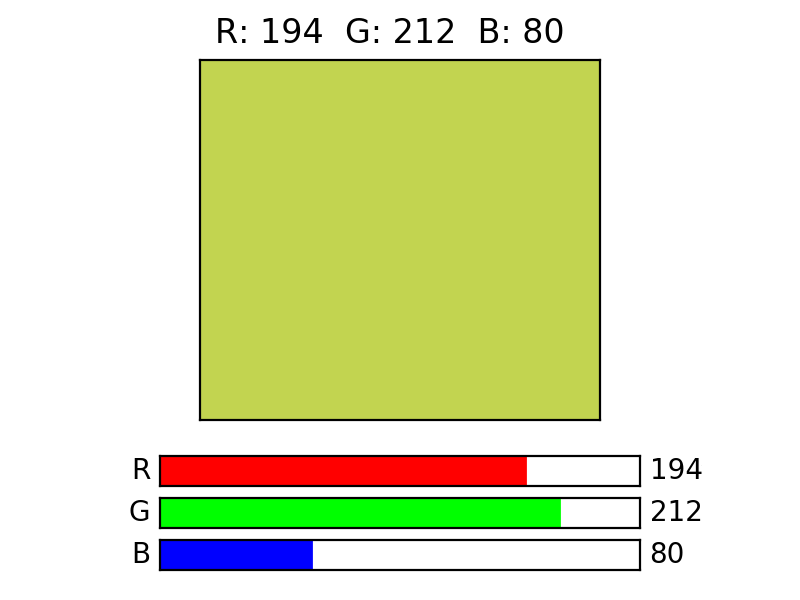

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.widgets import Slider
r_min, r_max, r_init = 0, 255, 100
g_min, g_max, g_init = 0, 255, 150
b_min, b_max, b_init = 0, 255, 80

fig = plt.figure(figsize = (4,3))

plot_ax = plt.axes([0.25, 0.3, 0.5, 0.6])
rslider_ax = plt.axes([0.2, 0.19, 0.6, 0.05])
gslider_ax = plt.axes([0.2, 0.12, 0.6, 0.05])
bslider_ax = plt.axes([0.2, 0.05, 0.6, 0.05])

#initial plot
rectangle_patch = patches.Rectangle(
                         (0, 0),        # coordinates of the lower left corner
                         width = 2,      # width
                         height = 2,     # height
                         color = np.array([r_init, g_init, b_init])/255,     # color
                        )
plot_ax.add_patch(rectangle_patch)
plot_ax.set_xticks([])
plot_ax.set_yticks([])
plot_ax.set_title("R: {:<4.0f}  G: {:<4.0f}  B: {:<4.0f}".format(r_init, g_init, b_init))

#sliders
r_slider = Slider(rslider_ax, 'R', r_min, r_max, valinit=r_init, valstep=1, valfmt="%d", color=(1, 0, 0))
g_slider = Slider(gslider_ax, 'G', g_min, g_max, valinit=g_init, valstep=1, valfmt="%d", color=(0, 1, 0))
b_slider = Slider(bslider_ax, 'B', b_min, b_max, valinit=b_init, valstep=1, valfmt="%d", color=(0, 0, 1))
r_slider.vline.set_alpha(0)
g_slider.vline.set_alpha(0)
b_slider.vline.set_alpha(0)

# A slider passes its value to its on_changed function. Since we have two sliders
# we could write one function for each. A simpler way is to write a single
# function that directly reads values of both sliders, ignoring the passed
# argument
def update(val):
    r = r_slider.val
    g = g_slider.val
    b = b_slider.val
    rectangle_patch.set_color(np.array([r, g, b])/255)
    plot_ax.set_title("R: {:<4.0f} G: {:<4.0f} B: {:<4.0f}".format(r, g, b))
    fig.canvas.draw_idle()

r_slider.on_changed(update)
g_slider.on_changed(update)
b_slider.on_changed(update)

plt.show()

In [2]:
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import figure, output_file, show, curdoc, output_notebook
from bokeh.models import LinearAxis, Range1d


def rgb_sliders():
    """
    
    """
    
    # diplay the image in a Jupyter notebook
    output_notebook() 

    # initial values of sliders
    vr, vg, vb = 127, 127, 127

    # convert RGB tuple to hexadecimal code
    def rgb_to_hex(rgb):
        return '#%02x%02x%02x' % rgb

    # convert RGB tuple to a string
    def rgb_to_str(*rgb):
        return "R: {}  G: {}  B: {}".format(*rgb)


    # convert hexadecimal to RGB tuple
    def hex_to_dec(hex):
        red = ''.join(hex.strip('#')[0:2])
        green = ''.join(hex.strip('#')[2:4])
        blue = ''.join(hex.strip('#')[4:6])
        return (int(red, 16), int(green, 16), int(blue,16))


    hex_color = rgb_to_hex((vr, vg, vb))

    # initialise the text color as black. This will be switched to white if the block color gets dark enough
    text_color = '#ffffff'

    # create a data source to enable refreshing of fill & text color
    source = ColumnDataSource(data=dict(color=[hex_color], text_color=[text_color], text=[rgb_to_str(vr, vg, vb)]))

    # create plot, as a rect() glyph and centered text label, with fill and text color taken from source
    p1 = figure(x_range=(-8, 8), y_range=(-4, 4),
                plot_width=350, plot_height=200,
                title='move sliders to change color', tools='')

    # added just to get a black frame arund the plot
    p1.extra_x_ranges = {"foox": Range1d(start=-100, end=200)}
    p1.extra_y_ranges = {"fooy": Range1d(start=-100, end=200)}
    p1.add_layout(LinearAxis(x_range_name="foox"), 'above')
    p1.add_layout(LinearAxis(y_range_name="fooy"), 'right')

    p1.xaxis.major_tick_line_color = None  # turn off x-axis major ticks
    p1.xaxis.minor_tick_line_color = None  # turn off x-axis minor ticks
    p1.yaxis.major_tick_line_color = None  # turn off y-axis major ticks
    p1.yaxis.minor_tick_line_color = None  # turn off y-axis minor ticks
    p1.xaxis.major_label_text_font_size = '0pt'  # preferred method for removing tick labels
    p1.yaxis.major_label_text_font_size = '0pt'  # preferred method for removing tick labels


    p1.rect(0, 0, width=18, height=10, fill_color='color',
            line_color = 'black', source=source)

    p1.text(0, 0, text='text', text_color='text_color',
            alpha=0.6667, text_font_size='20pt', text_baseline='middle',
            text_align='center', source=source)

    red_slider = Slider(title="R", start=0, end=255, value=vr, step=1)
    green_slider = Slider(title="G", start=0, end=255, value=vg, step=1)
    blue_slider = Slider(title="B", start=0, end=255, value=vb, step=1)

    # the callback function to update the color of the block and associated label text
    callback = CustomJS(args=dict(source=source, red=red_slider, blue=blue_slider, green=green_slider), code="""
        function componentToHex(c) {
            var hex = c.toString(16)
            return hex.length == 1 ? "0" + hex : hex
        }
        function rgbToHex(r, g, b) {
            return "#" + componentToHex(r) + componentToHex(g) + componentToHex(b)
        }
        function rgbToStr(r, g, b) {
            return "R: " + r.toString() + "  G: " + g.toString() + "  B: " + b.toString()
        }
        function toInt(v) {
           return v | 0
        }
        const color = source.data['color']
        const text_color = source.data['text_color']
        const text = source.data['text']
        const R = toInt(red.value)
        const G = toInt(green.value)
        const B = toInt(blue.value)
        color[0] = rgbToHex(R, G, B)
        text_color[0] = '#ffffff'
        text[0] = rgbToStr(R, G, B)
        if ((R + B  + G > 350)) {
            text_color[0] = '#000000'
        }
        source.change.emit()
    """)

    red_slider.js_on_change('value', callback)
    blue_slider.js_on_change('value', callback)
    green_slider.js_on_change('value', callback)

    show(gridplot([p1, red_slider, green_slider, blue_slider], ncols =1, toolbar_options={"logo":None}))

In [3]:
rgb_sliders()

Loading BokehJS ...